# Belarus Car Price Prediction

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv(r"C:\Users\user\Downloads\cars.csv")
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [83]:
data.shape

(56244, 12)

In [84]:
data.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [85]:
data.drop(columns = ['model','segment'], inplace=True)

In [86]:
data.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [87]:
data['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

In [88]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
data['make_segment'] = data['make'].apply(car_make)

In [89]:
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [90]:
data.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


### Car Make Segment

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

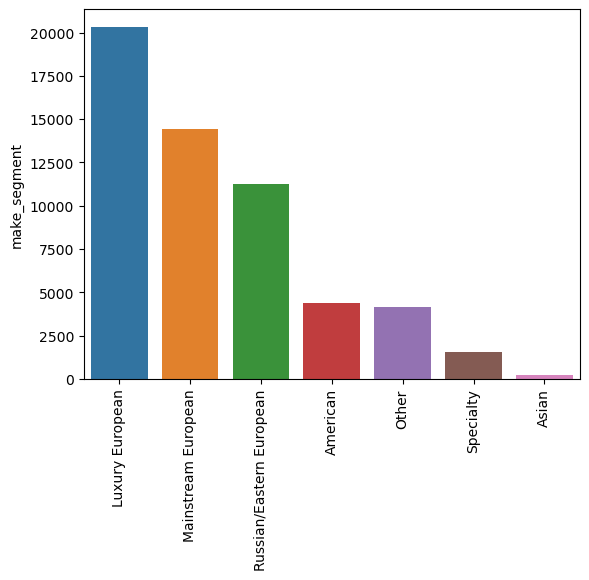

In [91]:
sns.barplot(x=data['make_segment'].unique(), y=data['make_segment'].value_counts(), data=data)
plt.xticks(rotation=90)

### Categorical Variable Distribution

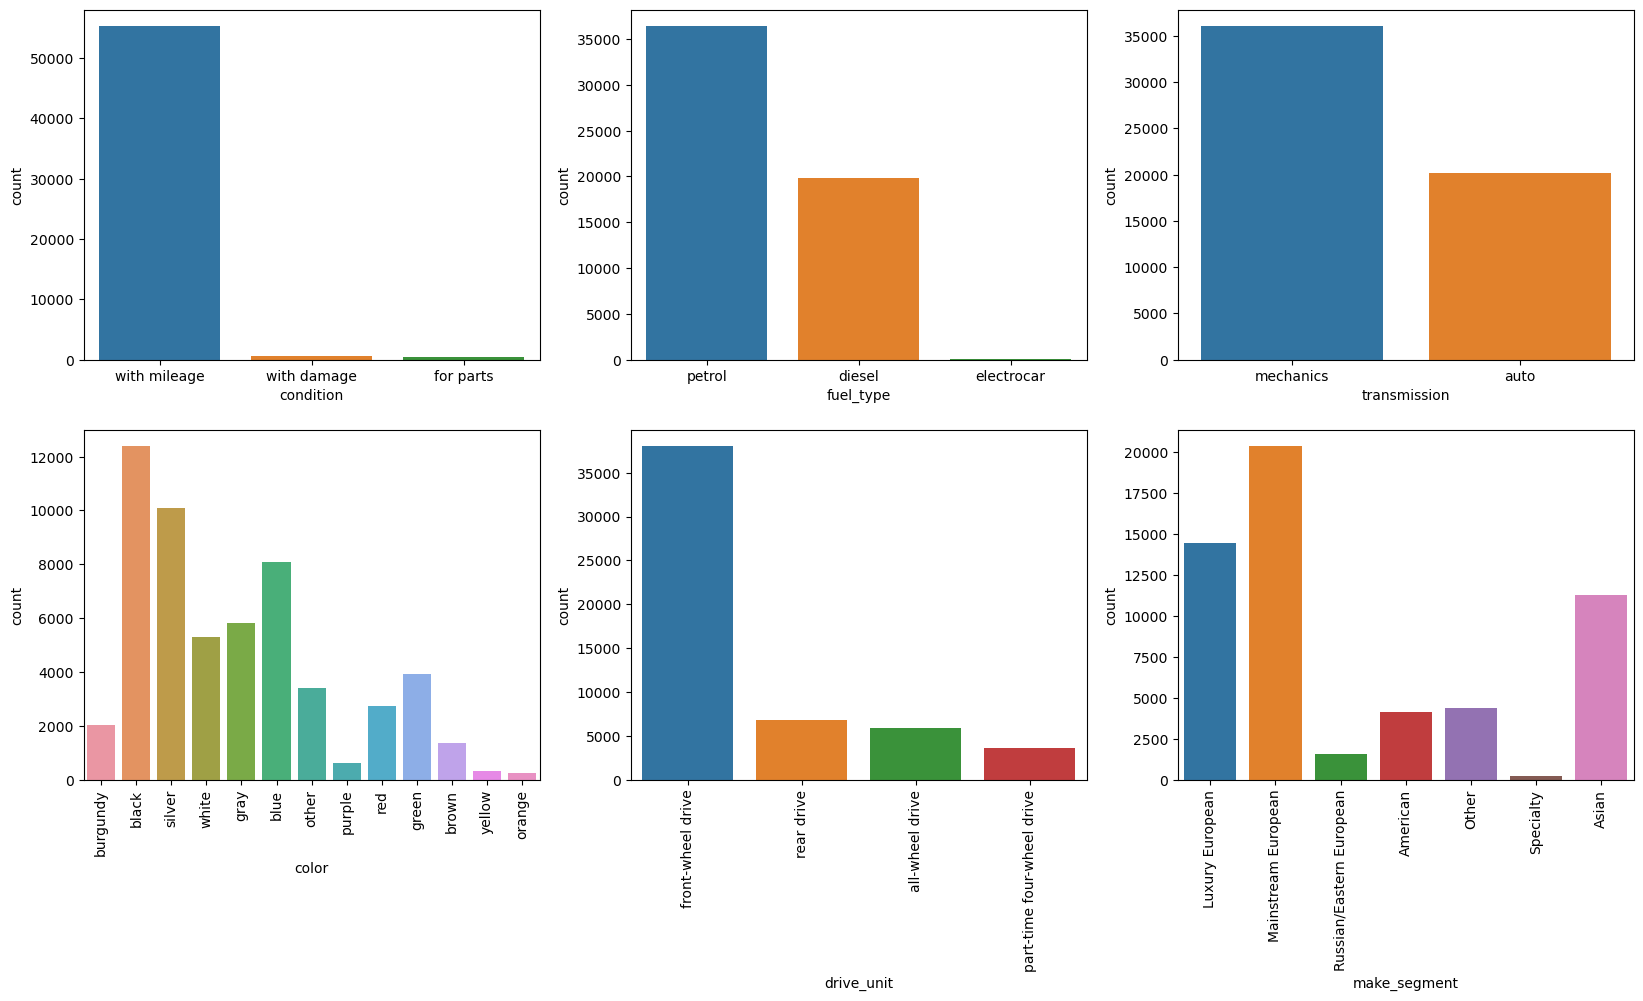

In [92]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=data, ax=ax[0,0])
sns.countplot(x='fuel_type', data=data, ax=ax[0,1])
sns.countplot(x='transmission', data=data, ax=ax[0,2])
sns.countplot(x='color', data=data, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=data, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=data, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

### Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

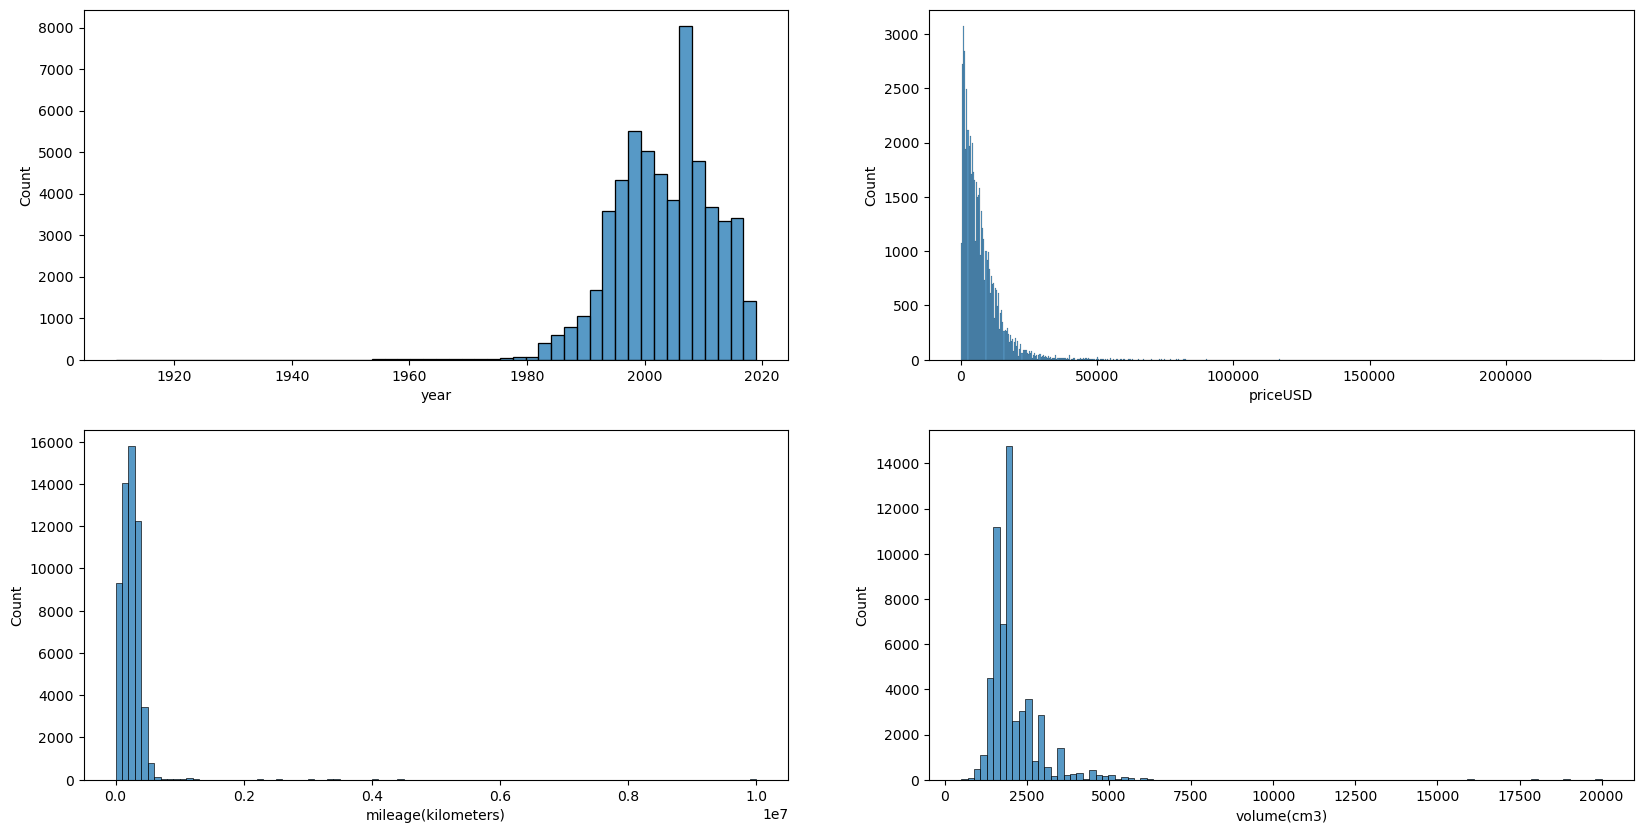

In [93]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (data['year'], ax=ax[0,0], bins = 50)
sns.histplot(data['priceUSD'], ax=ax[0,1])
sns.histplot(data['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(data['volume(cm3)'], ax=ax[1,1], bins = 100)

In [94]:
data= data[data['year']>1980]

### Price and Make

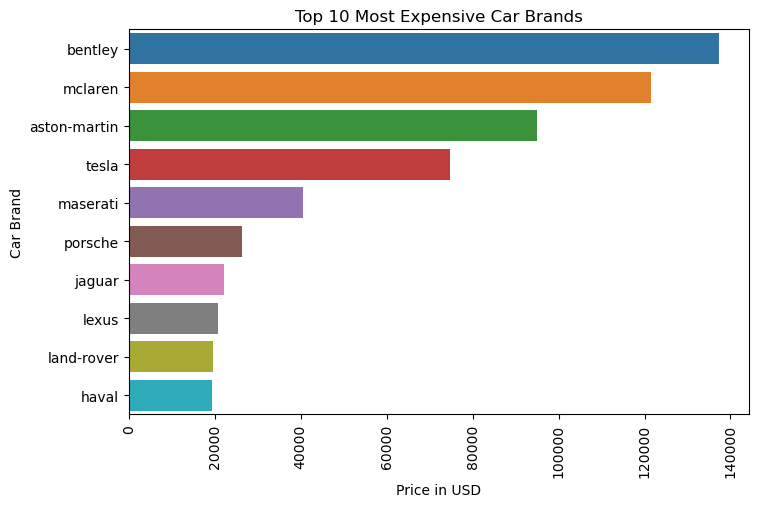

In [95]:
demo_data = data.groupby('make')['priceUSD'].mean().reset_index()
demo_data = demo_data.sort_values(by='priceUSD', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demo_data)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

### Price and Condition

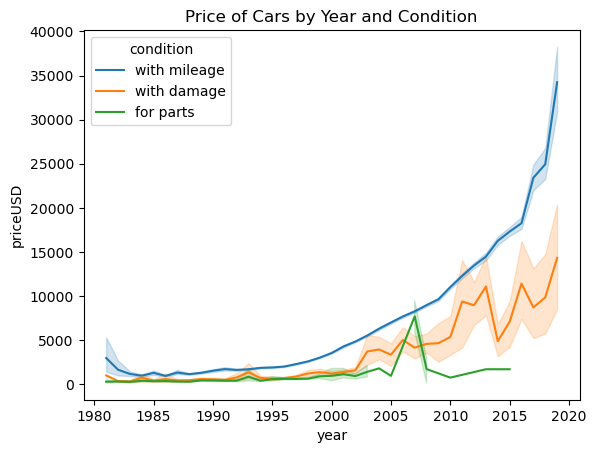

In [96]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

### Price and Transmission

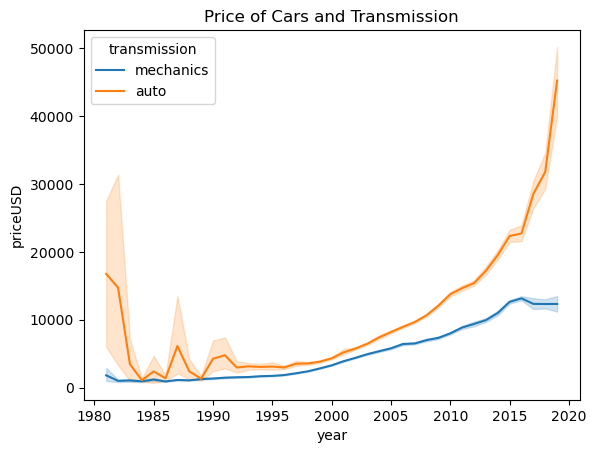

In [97]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

### Price and Fuel Type

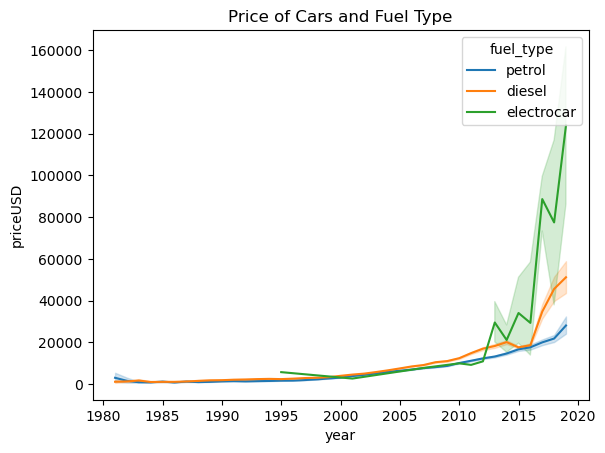

In [98]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

### Price and Drive Unit

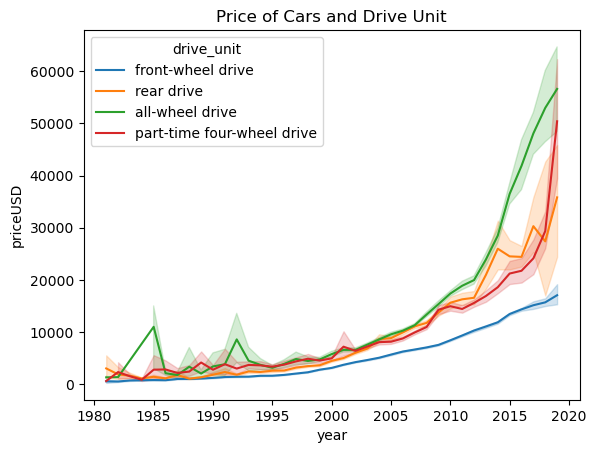

In [99]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

### Price and Brand Segment

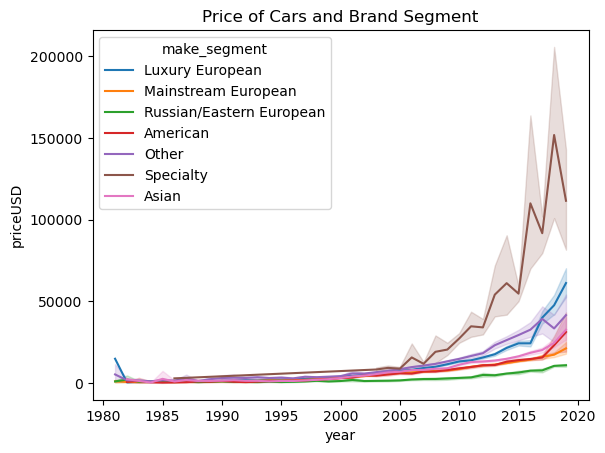

In [100]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

In [101]:
data.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [102]:
data.dropna(inplace=True)

In [104]:
data.drop(columns=['make'], inplace=True)

#### Label encoding for object data type

In [106]:
from sklearn.preprocessing import LabelEncoder

cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    print(col, data[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


## Correlation Matrix Heatmap

<Axes: >

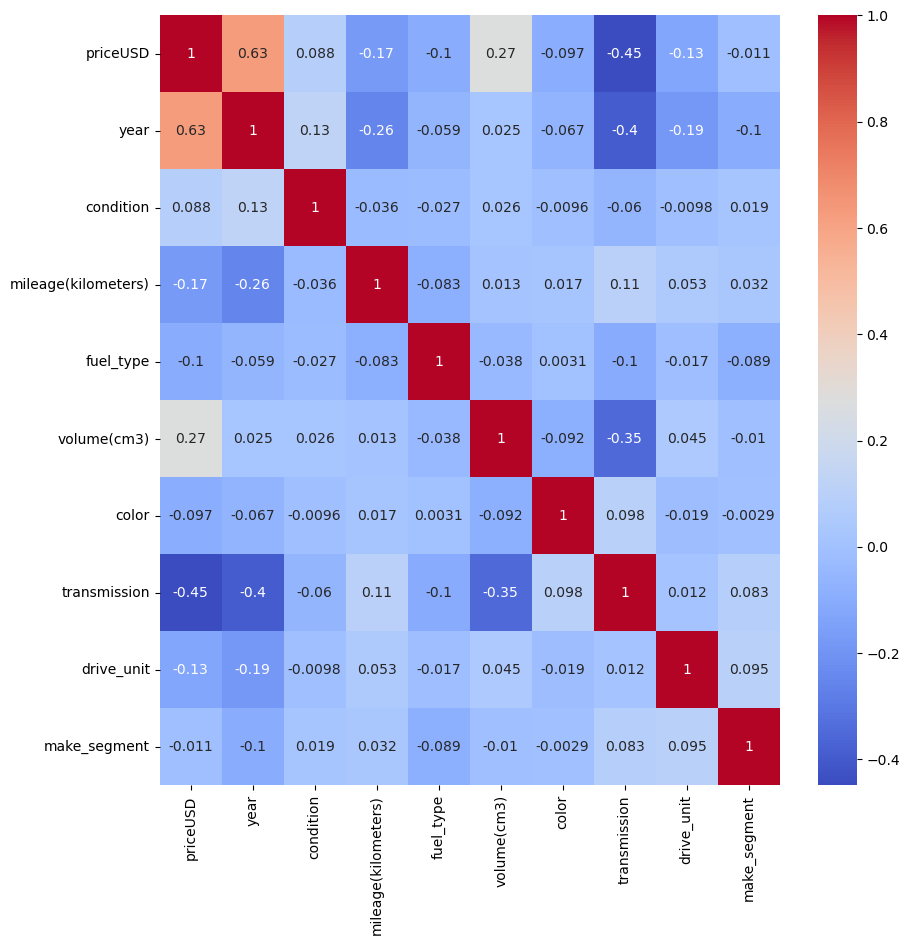

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

## Train Test Split

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['priceUSD']), data['priceUSD'], test_size=0.2, random_state=42)

### Decision Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#### Hypertuning using GridSearchCV

In [111]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 0}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [112]:
dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=2, random_state=0)

dtr.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      random_state=0)

In [113]:
#training score
dtr.score(X_train, y_train)

0.8569012052433005

In [114]:
#predicting the test set
y_pred = dtr.predict(X_test)

## Model Evaluation

In [115]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8232660892531781
Mean Squared Error:  12098034.939217934
Mean Absolute Error:  1710.8512753329946
Root Mean Squared Error:  3478.222957088567


## Feature Importance

In [116]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.639674
4,volume(cm3),0.269616
2,mileage(kilometers),0.033052
8,make_segment,0.021674
7,drive_unit,0.017830
3,fuel_type,0.010134
6,transmission,0.005859
5,color,0.002128
1,condition,0.000033


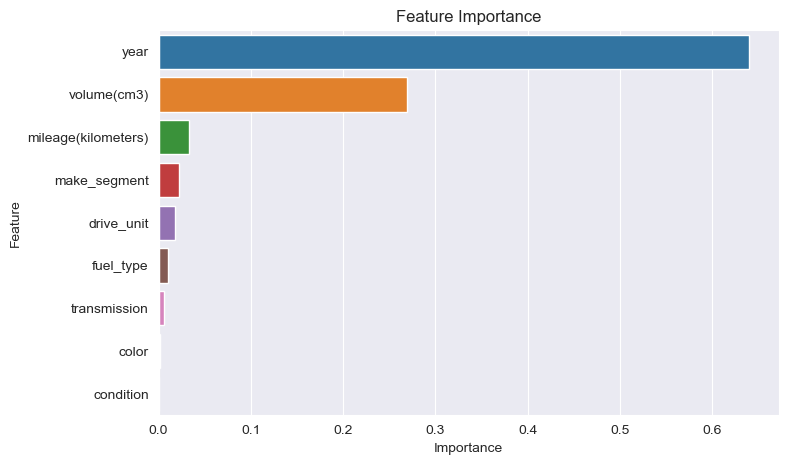

In [117]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()